In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
import numpy as np
import os
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

BASE_DIR = os.path.dirname(os.path.abspath(__name__))
FILE_DIR = os.path.join(BASE_DIR, 'files')

In [2]:
class DrowChart():        
    def str_to_float(self, value):
        ''' 문자열을 실수로 변환 '''
        
        return float(str(value).replace(',', '').replace('\n', ''))
    
    def percent_to_float(self, value):
        ''' 실수에서 % 제거 '''
        
        return float(str(value)[:-1])
    
    def date_format(self, date):
        ''' 날짜에 빈값 제거 '''
        
        return date.replace(' ', '')
        
    def data_pre_processing(self, df, x_label, y_label, title):
        ''' 데이터 전처리 '''
        
        df[x_label] = df[x_label].apply(self.date_format)
        
        if title == 'Dow Jones' or title == 'Nasdaq' or title == 'S&P'or title == 'UAS 30Years Bond':
            df[y_label] = df[y_label].apply(self.str_to_float)
        elif title == 'Interest Rate' or 'CPI':
            df[y_label] = df[y_label].apply(self.percent_to_float)
            
    def show_df(self, title):
        ''' Show DateFrame '''
        
        df = self.get_df(title)
        print(df)
    
    def get_df(self, title):
        ''' Create DateFrame '''
        
        df_dick = {
            'Dow Jones': pd.read_csv(f'{FILE_DIR}/DJIA.csv'),
            'Nasdaq': pd.read_csv(f'{FILE_DIR}/nasdaq_100.csv'),
            'S&P': pd.read_csv(f'{FILE_DIR}/S&P_500.csv'),
            'UAS 30Years Bond': pd.read_csv(f'{FILE_DIR}/usa_bond.csv'),
            'Interest Rate': pd.read_csv(f'{FILE_DIR}/interest_rate.csv'),
            'USA House Price Index': pd.read_csv(f'{FILE_DIR}/house_price.csv'),
            'CPI': pd.read_csv(f'{FILE_DIR}/cpi.csv')
        }
        return df_dick[title]
        
    def drow_chart(self, x_label, y_label, title):
        ''' Drow Chart '''
        
        df = self.get_df(title)
        self.data_pre_processing(df, x_label, y_label, title)
        self.show_df(title)
        
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot()
        ax.plot(df[x_label][::-1], df[y_label][::-1], marker='o', markersize=3)
        ax.xaxis.set_major_locator(MultipleLocator(12))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.tick_params(width=3, length=5, rotation=45)
        ax.set_title(title, fontsize=20)
        plt.grid()
        plt.show()

In [3]:
drow_chart = DrowChart()

## 다우지수

               날짜         종가         오픈         고가         저가    거래량    변동 %
0    2022- 08- 01  31,511.09  32,755.71  34,281.16  31,511.09    NaN  -4.07%
1    2022- 07- 01  32,846.45  30,740.97  32,906.21  30,145.31    NaN   6.71%
2    2022- 06- 01  30,779.71  33,156.31  33,270.83  29,654.59    NaN  -6.71%
3    2022- 05- 01  32,991.97  33,045.95  34,113.40  30,635.76  3.01B   0.04%
4    2022- 04- 01  32,977.21  34,740.89  35,492.22  32,913.15  7.22B  -4.91%
..            ...        ...        ...        ...        ...    ...     ...
219  2004- 05- 01  10,188.45  10,227.27  10,386.32   9,852.19  4.02B  -0.36%
220  2004- 04- 01  10,225.57  10,357.52  10,570.81  10,219.18  4.53B  -1.28%
221  2004- 03- 01  10,357.70  10,582.25  10,695.55  10,007.49  4.97B  -2.14%
222  2004- 02- 01  10,583.92  10,487.78  10,753.63  10,434.67  3.82B   0.91%
223  2004- 01- 01  10,488.07  10,452.74  10,705.18  10,367.41  4.38B   0.33%

[224 rows x 7 columns]


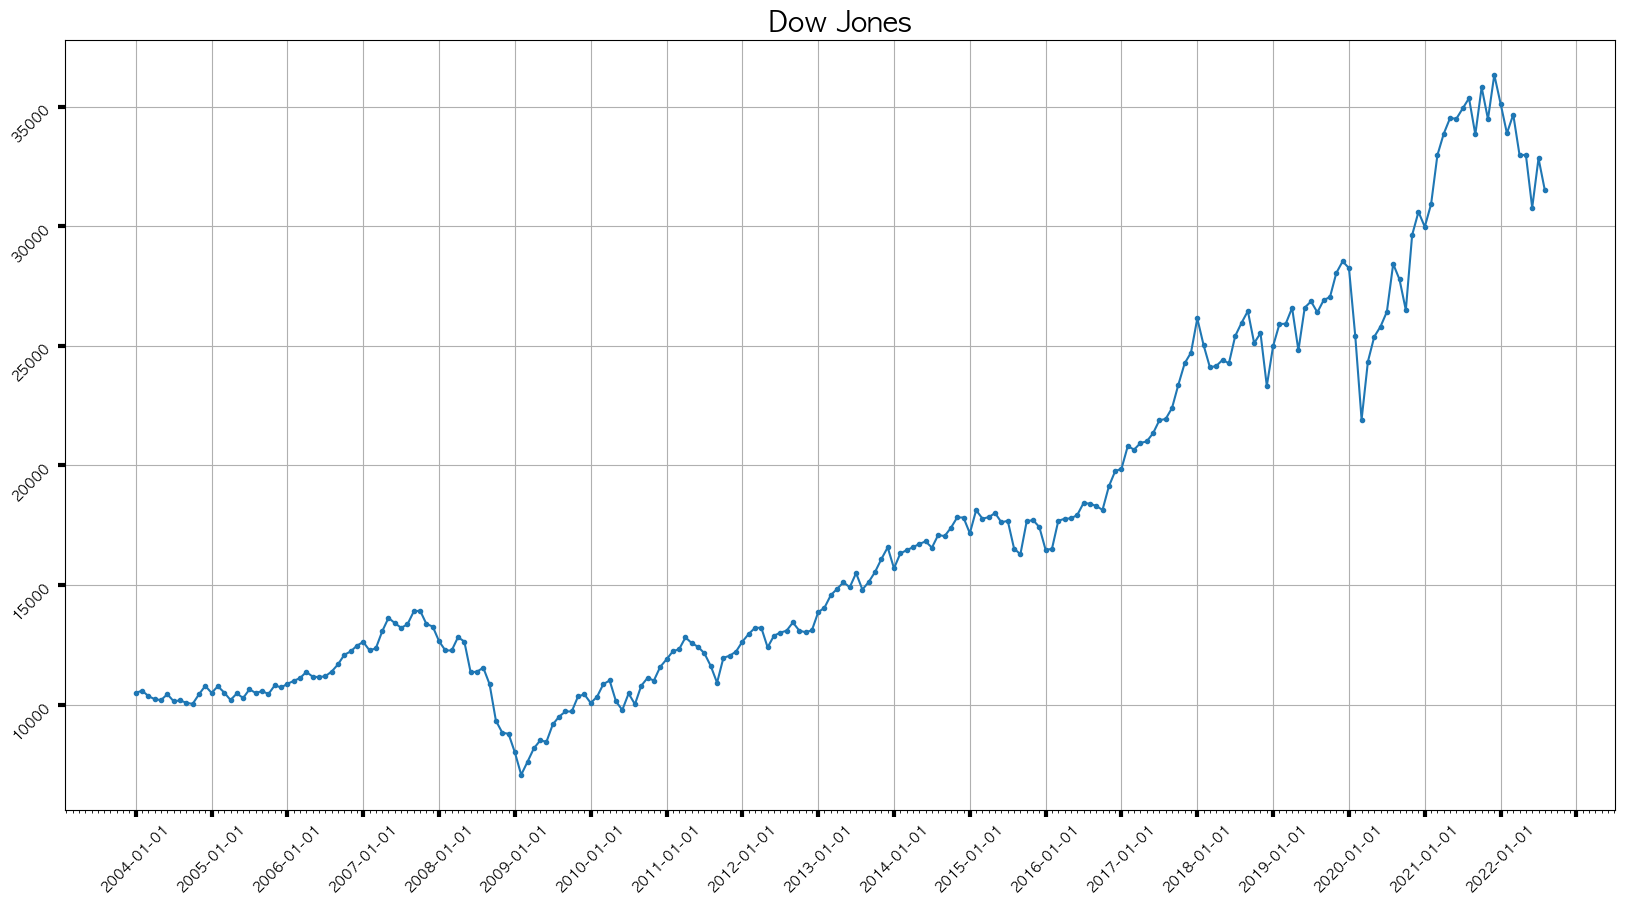

In [4]:
drow_chart.drow_chart('날짜', '종가', 'Dow Jones')

## 나스닥

               날짜         종가         오픈         고가         저가    거래량     변동 %
0    2022- 08- 01  12,272.03  12,877.69  13,720.71  12,240.83    NaN   -5.22%
1    2022- 07- 01  12,947.97  11,476.43  12,981.47  11,367.30    NaN   12.55%
2    2022- 06- 01  11,503.72  12,750.31  12,897.24  11,037.24    NaN   -9.00%
3    2022- 05- 01  12,642.10  12,864.83  13,556.67  11,493.11  1.09B   -1.65%
4    2022- 04- 01  12,854.80  14,886.91  15,161.89  12,835.48  4.50B  -13.37%
..            ...        ...        ...        ...        ...    ...      ...
219  2004- 05- 01   1,466.22   1,409.06   1,469.23   1,372.46    NaN    4.63%
220  2004- 04- 01   1,401.36   1,438.91   1,508.37   1,401.36    NaN   -2.58%
221  2004- 03- 01   1,438.41   1,476.04   1,494.67   1,368.08    NaN   -2.17%
222  2004- 02- 01   1,470.38   1,497.78   1,524.09   1,452.49    NaN   -1.52%
223  2004- 01- 01   1,493.08   1,474.16   1,559.47   1,458.51    NaN    1.71%

[224 rows x 7 columns]


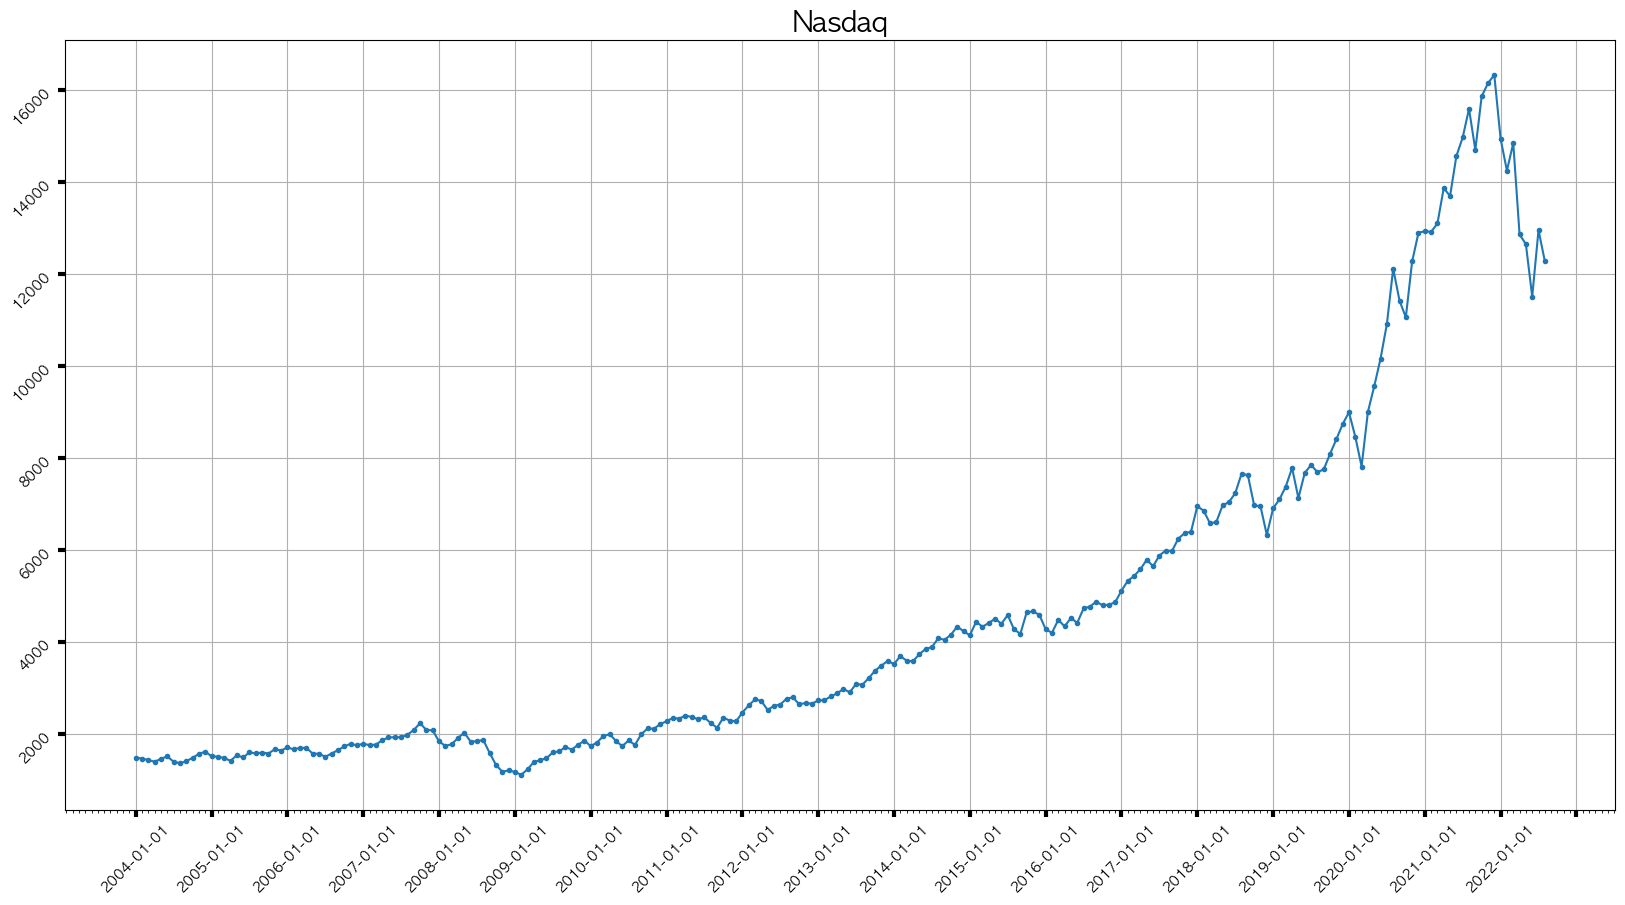

In [5]:
drow_chart.drow_chart('날짜', '종가', 'Nasdaq')

## S&P 500

               날짜        종가        오픈        고가        저가  거래량    변동 %
0    2022- 08- 01  3,955.00  4,103.38  4,325.50  3,954.90  NaN  -4.24%
1    2022- 07- 01  4,130.29  3,779.27  4,140.00  3,720.25  NaN   9.11%
2    2022- 06- 01  3,785.38  4,156.10  4,177.60  3,636.82  NaN  -8.39%
3    2022- 05- 01  4,132.15  4,132.70  4,307.90  3,810.50  NaN   0.01%
4    2022- 04- 01  4,131.93  4,547.90  4,593.90  4,123.87  NaN  -8.80%
..            ...       ...       ...       ...       ...  ...     ...
219  2004- 05- 01  1,120.68  1,107.30  1,127.74  1,076.32  NaN   1.21%
220  2004- 04- 01  1,107.30  1,126.21  1,150.57  1,107.23  NaN  -1.68%
221  2004- 03- 01  1,126.21  1,144.94  1,163.23  1,087.06  NaN  -1.64%
222  2004- 02- 01  1,144.94  1,131.13  1,158.98  1,124.44  NaN   1.22%
223  2004- 01- 01  1,131.13  1,111.92  1,155.38  1,105.08  NaN   1.73%

[224 rows x 7 columns]


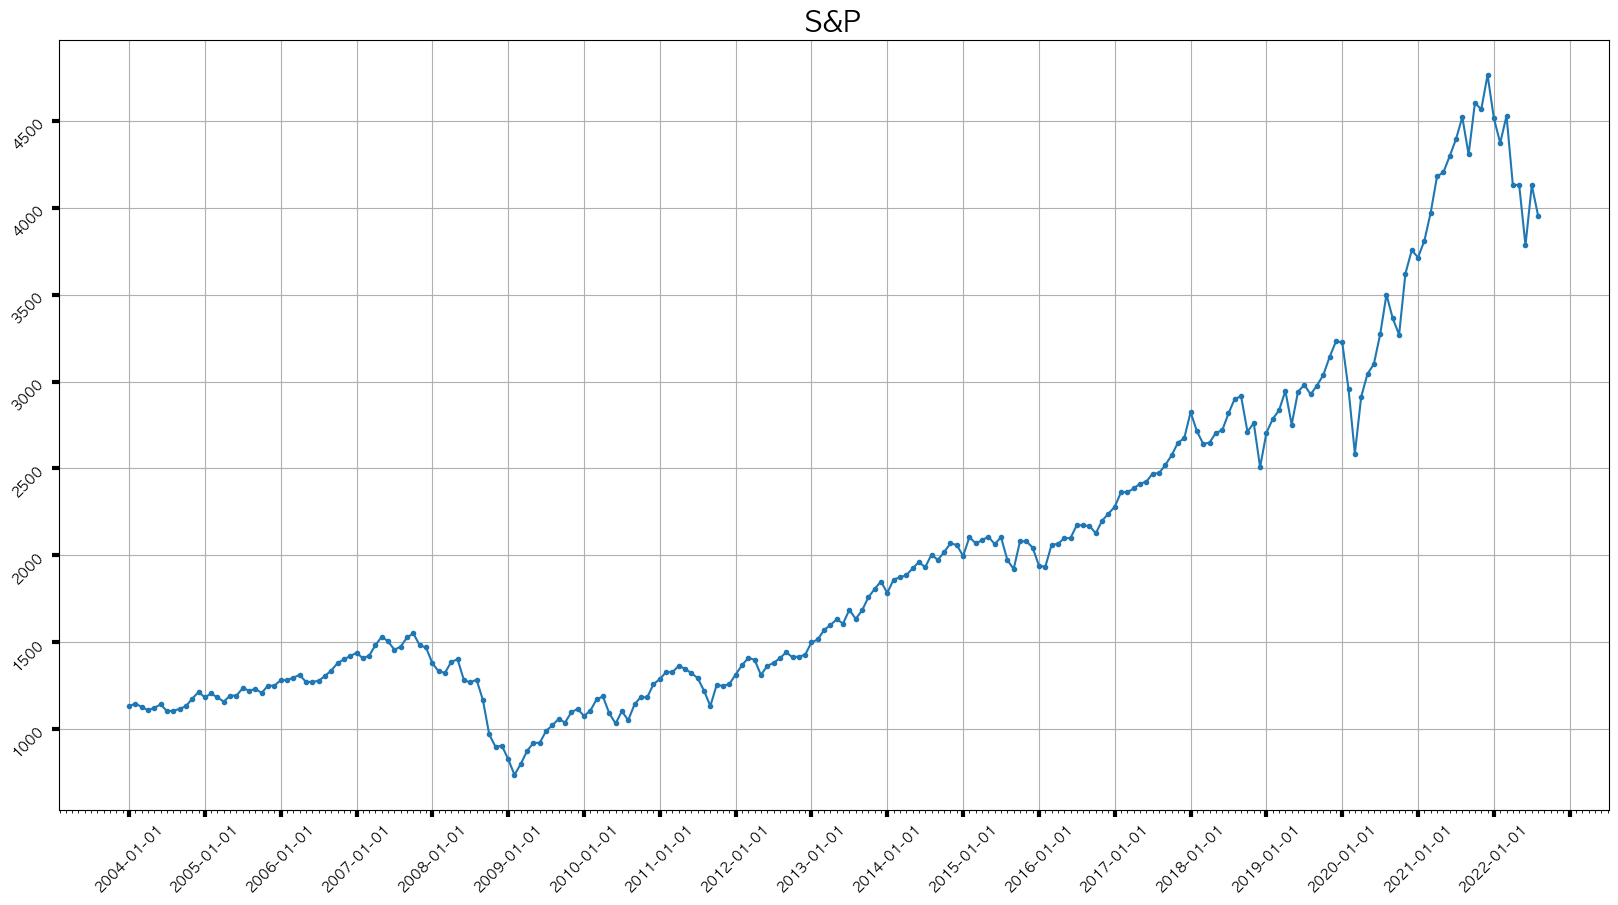

In [6]:
drow_chart.drow_chart('날짜', '종가', 'S&P')

## 30년만기 미국채

               날짜      종가     오픈       고가      저가    거래량      변동
0    2022- 10- 01  125.13  126.09  129.38  122.88  2.31M  -1.02%
1     2022- 9- 01  126.41  135.62  135.66  123.94  3.27M  -7.33%
2     2022- 8- 01  136.41  143.56  145.97  135.53  7.00M  -5.27%
3     2022- 7- 01  144.00  137.97  144.38  136.75  6.27M   3.88%
4     2022- 6- 01  138.62  140.41  141.00  132.28  2.33M  -1.30%
..            ...     ...     ...     ...     ...    ...     ...
389   1990- 5- 01   92.91   88.97   93.22   88.31  5.65M   4.62%
390   1990- 4- 01   88.81   92.00   93.88   88.22  5.52M  -3.34%
391   1990- 3- 01   91.88   93.22   94.03   91.25  2.39M  -1.53%
392   1990- 2- 01   93.31   94.31   95.09   91.50  6.86M  -1.00%
393   1990- 1- 01   94.25   98.53   98.78   92.56  6.91M  -4.47%

[394 rows x 7 columns]


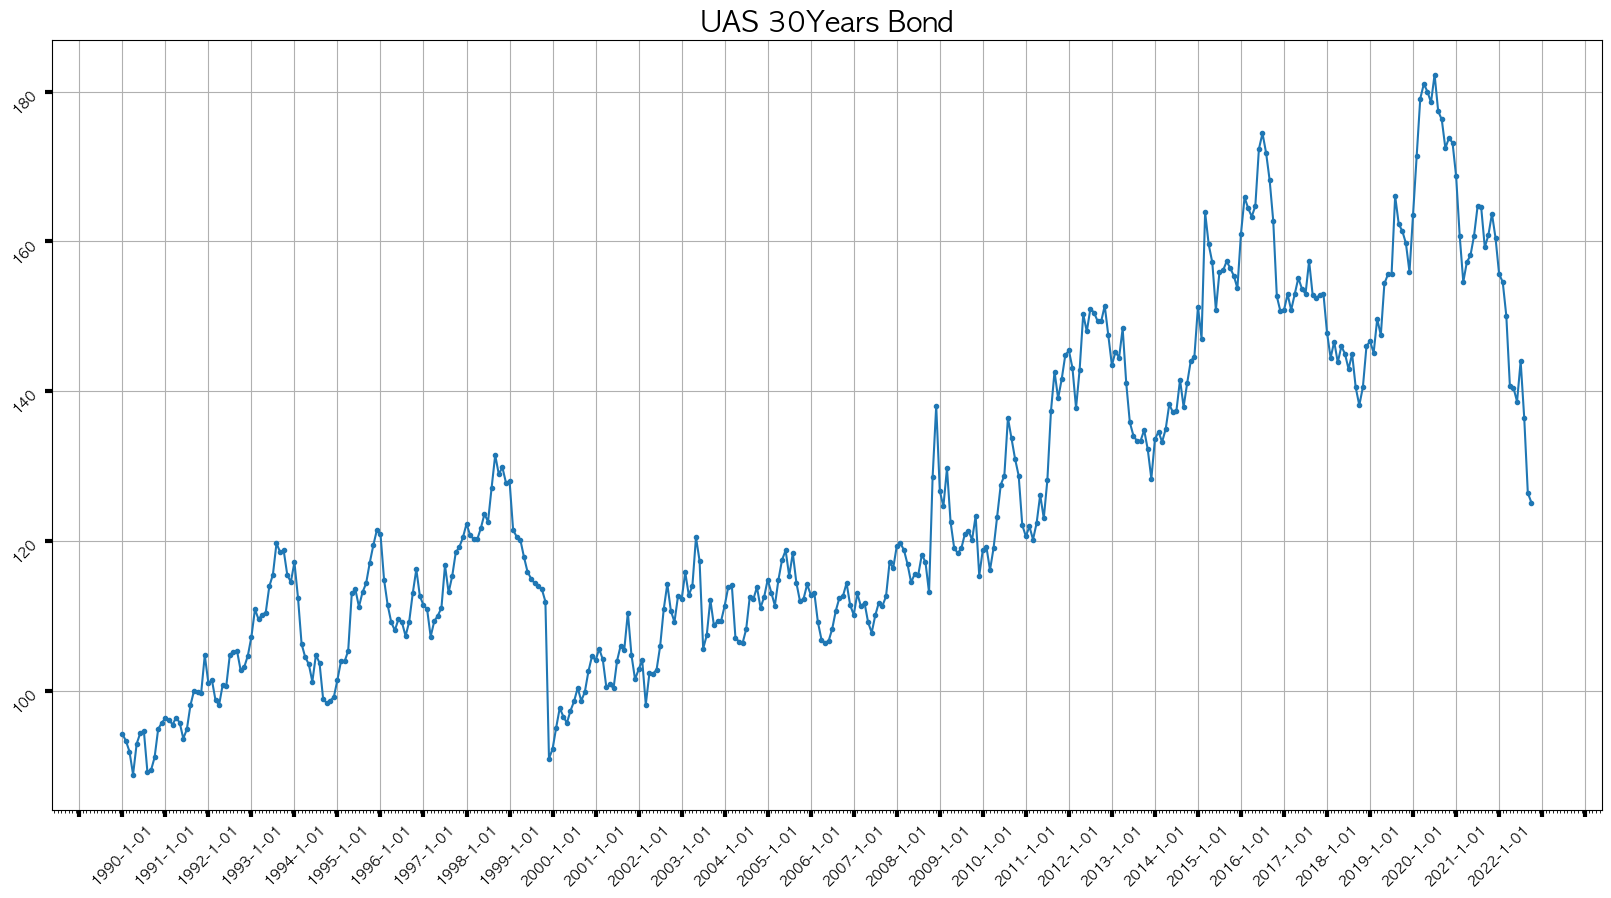

In [7]:
drow_chart.drow_chart('날짜', '종가', 'UAS 30Years Bond')

## 미국 금리

               날짜     시간     실제     예측     이전
0    2022- 12- 15  04:00     0%     0%     0%
1    2022- 11- 03  03:00     0%     0%  3.25%
2    2022- 09- 22  03:00  3.25%  3.25%  2.50%
3    2022- 07- 28  03:00  2.50%  2.50%  1.75%
4    2022- 06- 16  03:00  1.75%  1.50%  1.00%
..            ...    ...    ...    ...    ...
138  2004- 12- 15  03:00  2.25%     0%  2.00%
139  2004- 11- 11  03:00  2.00%     0%  1.75%
140  2004- 09- 22  03:00  1.75%     0%  1.50%
141  2004- 08- 11  03:00  1.50%     0%  1.25%
142  2004- 07- 01  03:00  1.25%     0%  1.00%

[143 rows x 5 columns]


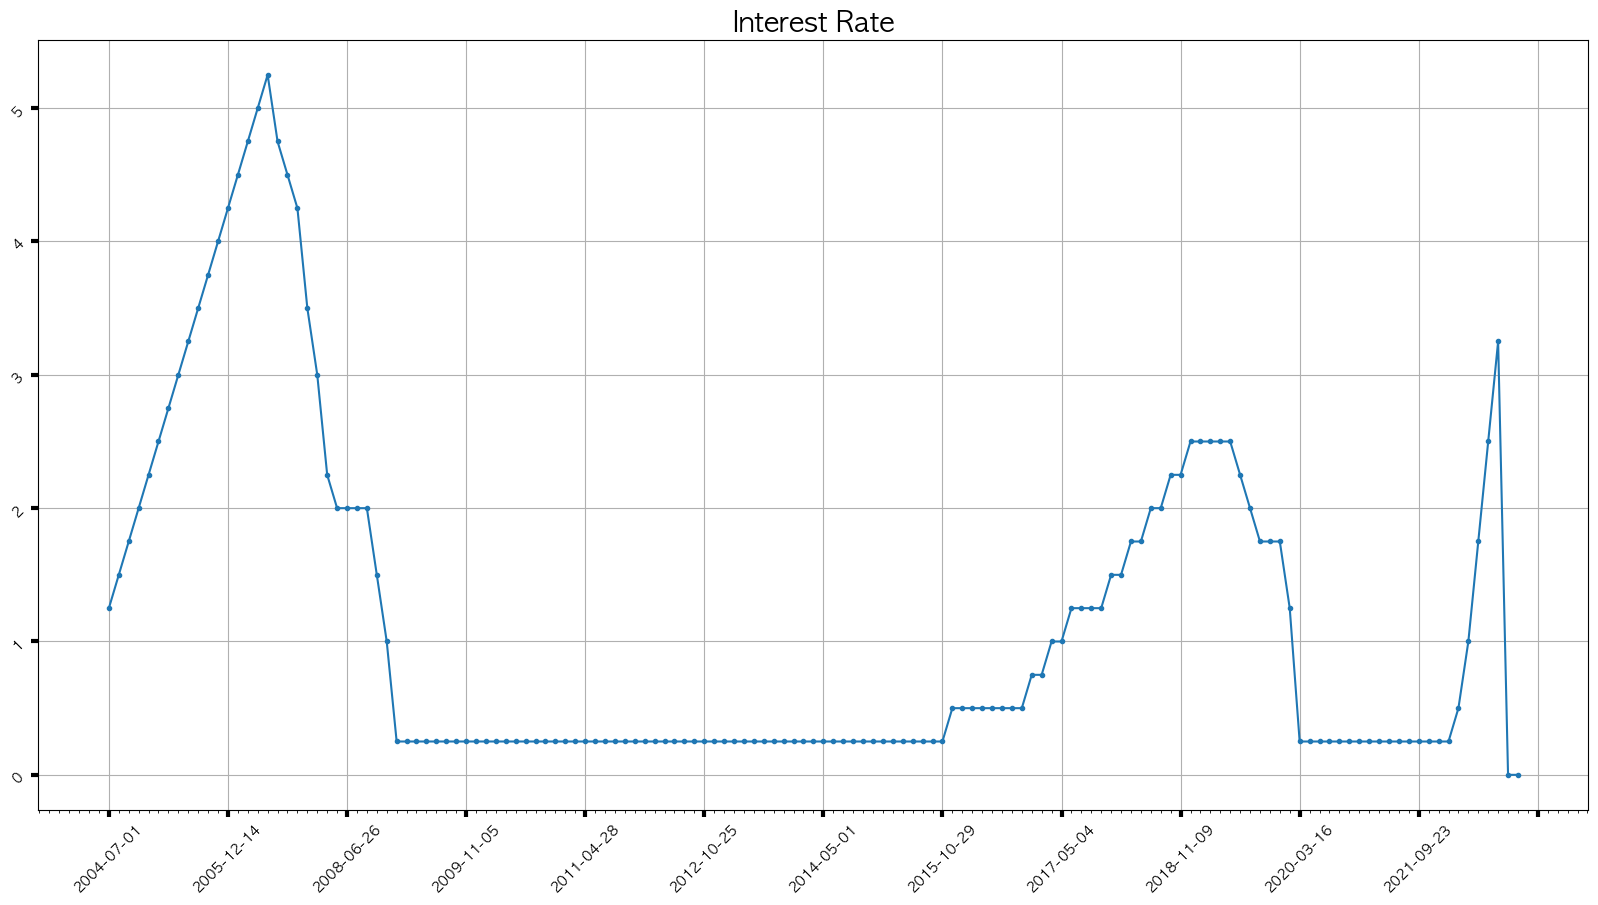

In [8]:
drow_chart.drow_chart('날짜', '실제', 'Interest Rate')

## 미국 주택가격지수

               날짜     시간     실제     이전
0    2022- 08- 25  22:00    0.0  395.2
1    2022- 07- 27  22:00  395.2  397.6
2    2022- 06- 30  22:00  398.0  397.6
3    2022- 05- 26  22:00  398.1  392.7
4    2022- 04- 28  22:00  392.9  386.8
..            ...    ...    ...    ...
375  1991- 06- 01  18:00  100.6  100.5
376  1991- 05- 01  18:00  100.5  100.4
377  1991- 04- 01  18:00  100.4  100.5
378  1991- 03- 01  18:00  100.5  100.5
379  1991- 03- 01  18:00  100.5  100.0

[380 rows x 4 columns]


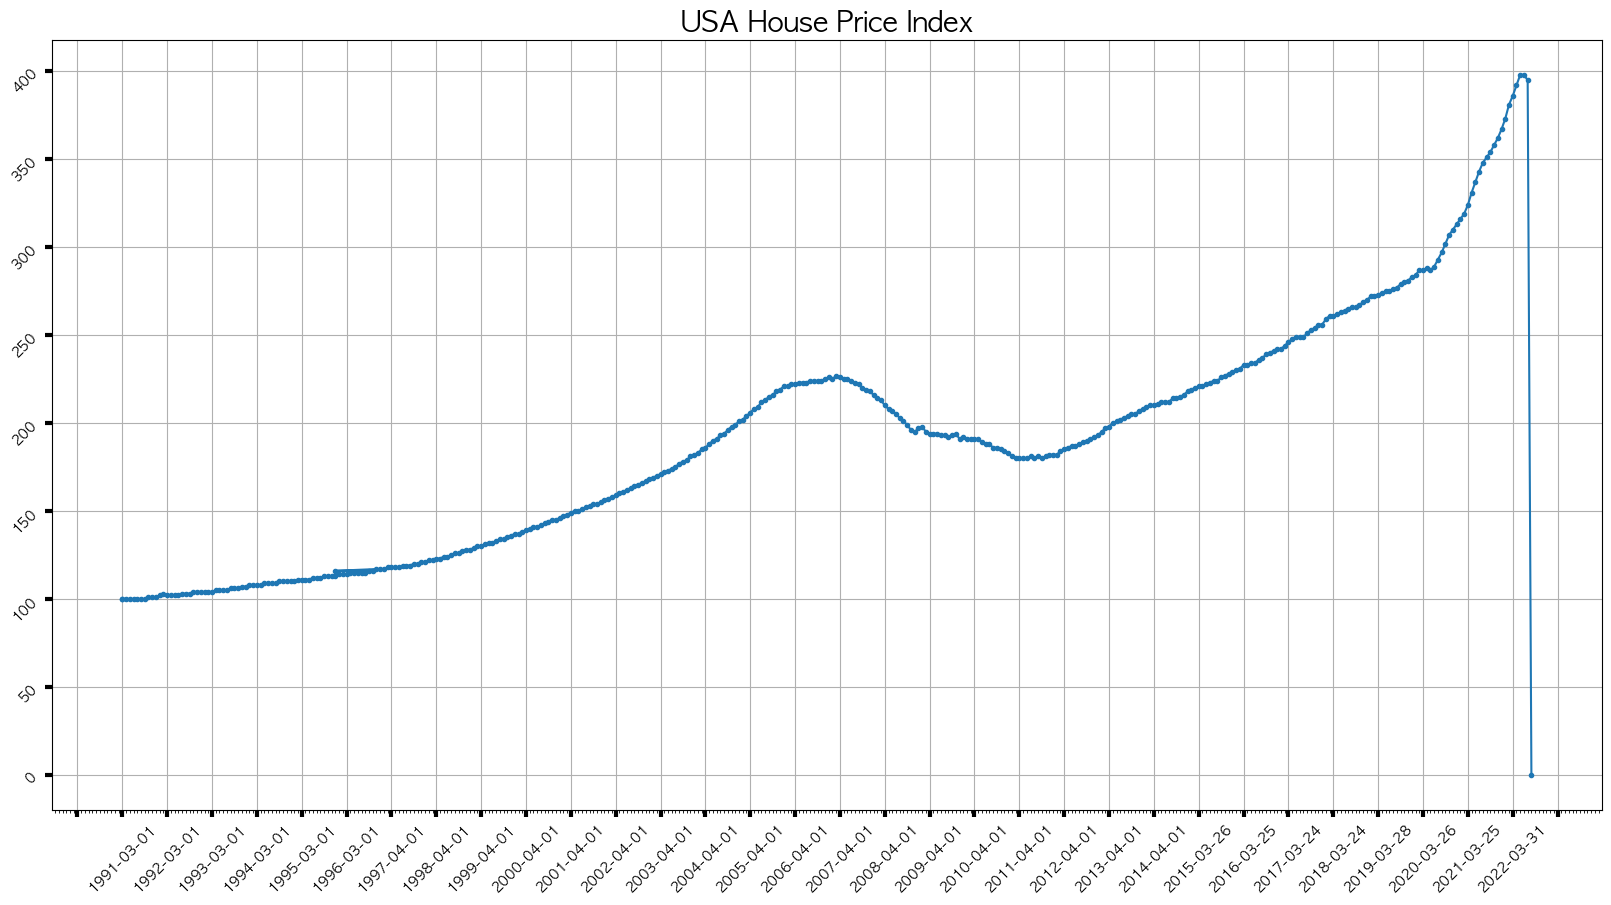

In [9]:
drow_chart.drow_chart('날짜', '실제', 'USA House Price Index')

## 미국 소비자물가지수(CPI)

               날짜     시간     실제     예측     이전
0    2022- 09- 13  21:30   0.4%   0.2%   0.1%
1    2022- 08- 13  21:30   0.1%  -0.1%   0.0%
2    2022- 07- 10  21:30   0.0%   0.2%   1.3%
3    2022- 06- 13  21:30   1.3%   1.1%   1.0%
4    2022- 05- 10  21:30   1.0%   0.7%   0.3%
..            ...    ...    ...    ...    ...
628  1970- 05- 01  18:00  0.30%      0  0.50%
629  1970- 04- 01  18:00  0.50%      0  0.50%
630  1970- 03- 01  18:00  0.50%      0  0.50%
631  1970- 02- 01  18:00  0.50%      0  0.50%
632  1970- 01- 01  18:00  0.50%      0  0.50%

[633 rows x 5 columns]


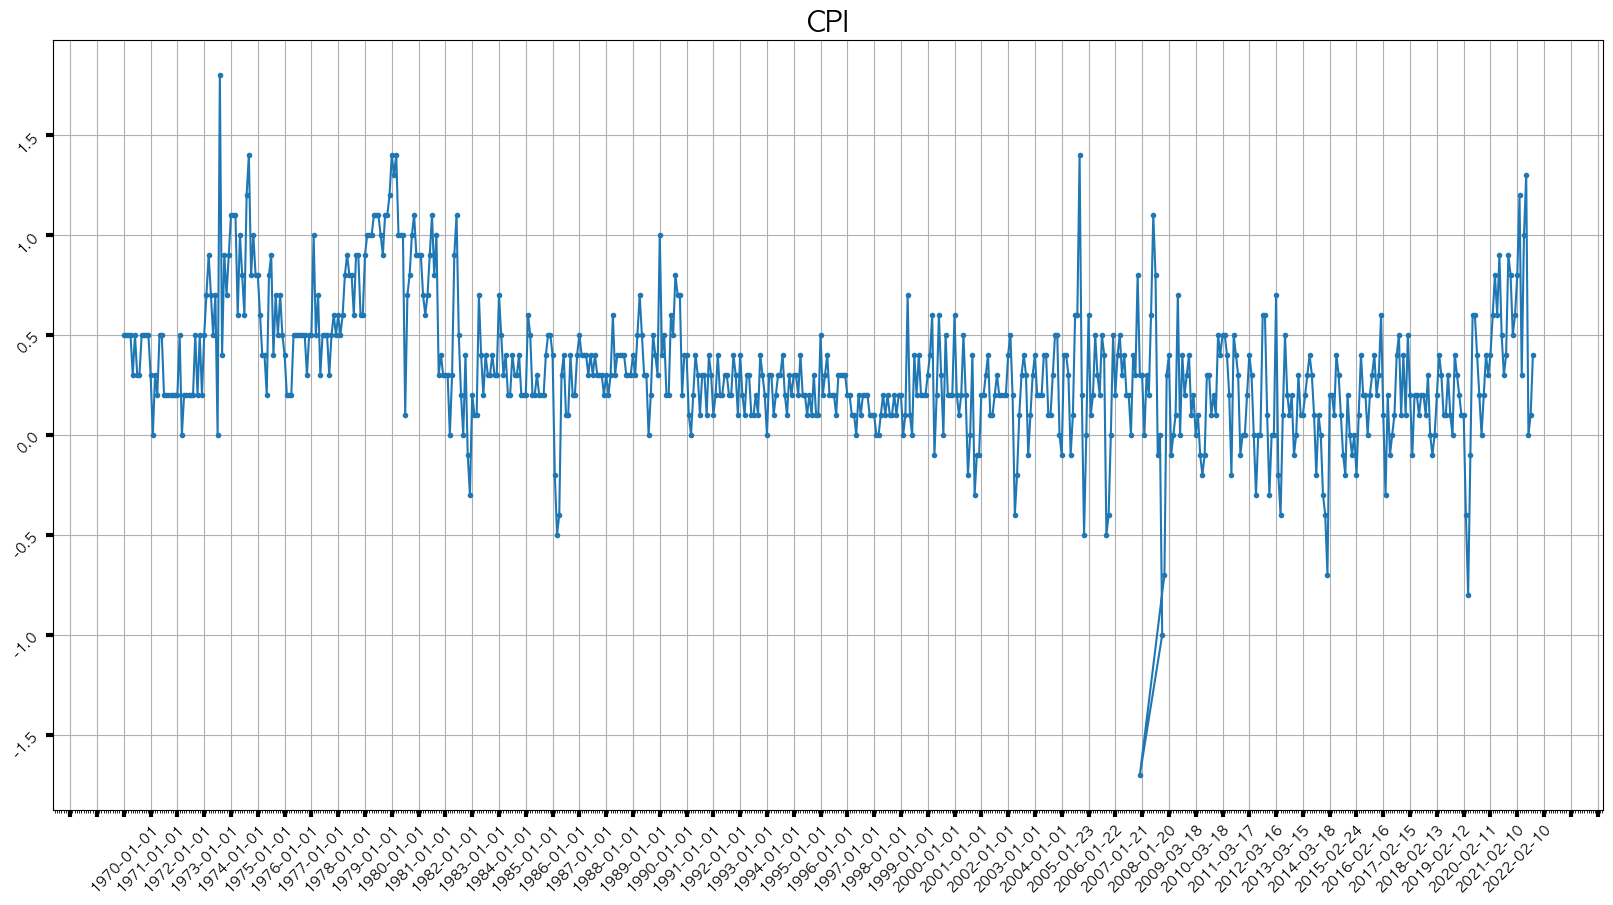

In [10]:
drow_chart.drow_chart('날짜', '실제', 'CPI')